# Train Semantic Segmentation Model

The following code will automatically install and activate the conda environment with relevent packages and run the CLI command for running the training loop. 

To customize architecture go to:
GeoSeg/models/ABCNet.py

To customize trianing params go to:
GeoSeg/models/model_config/abcnet.py

In [8]:
#code to install yml file
%conda init
%conda activate geoseg
%python -m GeoSeg.models.model_config.model_loader -c config/Urban/abcnet.py

no change     /opt/tljh/user/condabin/conda
no change     /opt/tljh/user/bin/conda
no change     /opt/tljh/user/bin/conda-env
no change     /opt/tljh/user/bin/activate
no change     /opt/tljh/user/bin/deactivate
no change     /opt/tljh/user/etc/profile.d/conda.sh
no change     /opt/tljh/user/etc/fish/conf.d/conda.fish
no change     /opt/tljh/user/shell/condabin/Conda.psm1
no change     /opt/tljh/user/shell/condabin/conda-hook.ps1
no change     /opt/tljh/user/lib/python3.10/site-packages/xontrib/conda.xsh
no change     /opt/tljh/user/etc/profile.d/conda.csh
no change     /home/jupyter-dai7591/.bashrc
No action taken.

Note: you may need to restart the kernel to use updated packages.

CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


## Visualize results
Run this at the end of the training log to see graphs of training results.

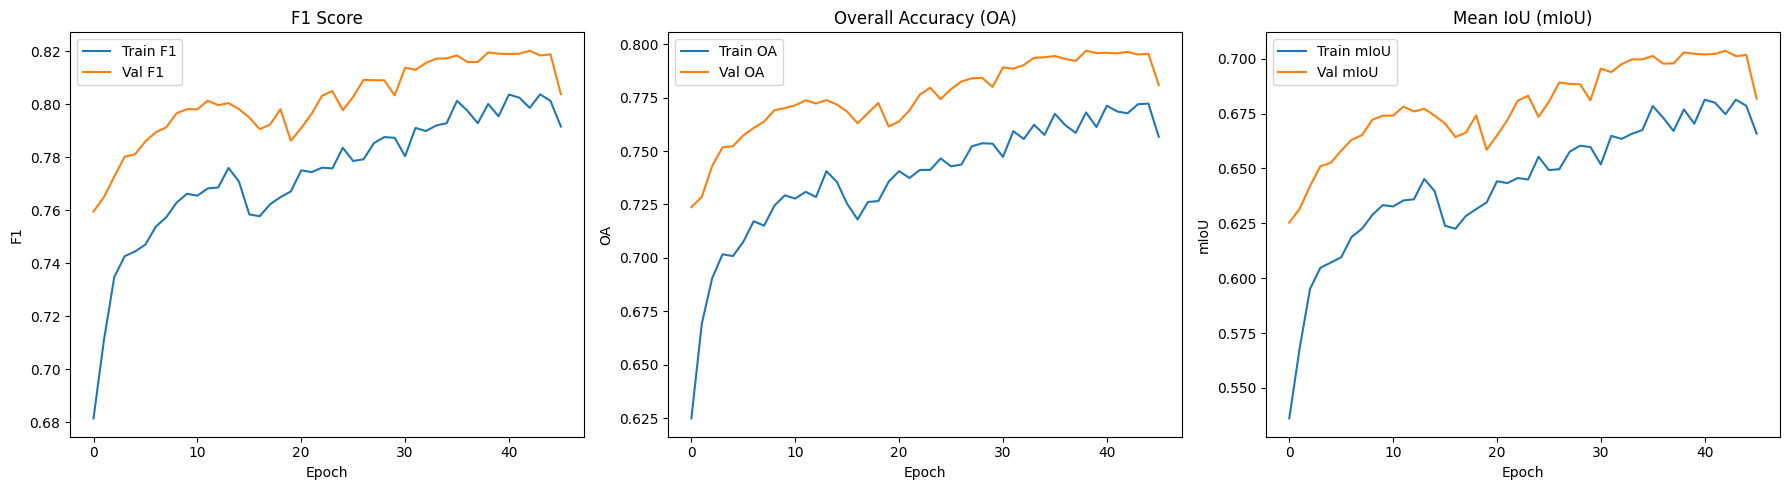

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load metrics
metrics_path = "GeoSeg/models/ckpt/abcnet-512-crop-ms-e200/metrics/metrics.csv"
df = pd.read_csv(metrics_path)

# Separate training and validation rows
train_df = df[df['train_F1'].notna()]
val_df = df[df['val_F1'].notna()]

# Plot training and validation metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# F1 Score
axs[0].plot(train_df['epoch'], train_df['train_F1'], label='Train F1')
axs[0].plot(val_df['epoch'], val_df['val_F1'], label='Val F1')
axs[0].set_title('F1 Score')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('F1')
axs[0].legend()

# Overall Accuracy (OA)
axs[1].plot(train_df['epoch'], train_df['train_OA'], label='Train OA')
axs[1].plot(val_df['epoch'], val_df['val_OA'], label='Val OA')
axs[1].set_title('Overall Accuracy (OA)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('OA')
axs[1].legend()

# mIoU
axs[2].plot(train_df['epoch'], train_df['train_mIoU'], label='Train mIoU')
axs[2].plot(val_df['epoch'], val_df['val_mIoU'], label='Val mIoU')
axs[2].set_title('Mean IoU (mIoU)')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('mIoU')
axs[2].legend()

plt.tight_layout()
plt.show()